# 최대 손실 낙폭 📉

coredotfinance를 통해서 최대 손실 낙폭 즉, MDD를 구해보자

        MDD = (최저점 - 최고점) / 최고점
        
MDD란 특정 기간 동안 얼마큼의 최대 손실이 날 수 있는지를 나타낸다.  

퀀트 투자에서는 수익률을 높이는 것보다 MDD를 낮추는 것이 더 낫다로 할 만큼 중요한 지표다.

비트코인의 최대 손실 낙폭과 삼성전자의 최대 손실 낙폭을 비교해보자

## 삼성전자의 최대 손실 낙폭

In [1]:
from coredotfinance.data import KrxReader
krx = KrxReader()
data = krx.read('005930', start='2020-08-01', end='2021-08-01', reverse=True)
data

삼성전자


,close,change,change_ratio,open,high,low,volume,trading_value,market_cap,shares_outstanding
2020-08-03,56800,-1100,-1.90,57800,57900,56700,21158940,1209657414100,339083648840000,5969782550
2020-08-04,57300,500,0.88,57200,58100,57000,19419694,1115746295800,342068540115000,5969782550
2020-08-05,56900,-400,-0.70,57300,57500,56300,17739706,1007826798950,339680627095000,5969782550
2020-08-06,58000,1100,1.93,57100,58400,57100,21625874,1250813614044,346247387900000,5969782550
2020-08-07,57500,-500,-0.86,57900,58400,57100,18751717,1081791206100,343262496625000,5969782550
...,...,...,...,...,...,...,...,...,...,...
2021-07-26,78800,-500,-0.63,79400,79500,78800,10040975,792954940200,470418864940000,5969782550
2021-07-27,78500,-300,-0.38,79200,79400,78500,11427693,900948843000,468627930175000,5969782550
2021-07-28,79200,700,0.89,78300,79200,78100,12743417,1000757015703,472806777960000,5969782550
2021-07-29,79000,-200,-0.25,78800,79400,78800,14360453,1134761032300,471612821450000,5969782550


### 삼성전자의 1년간 종가 그래프

        최대값: 91000
        최솟값 : 54000


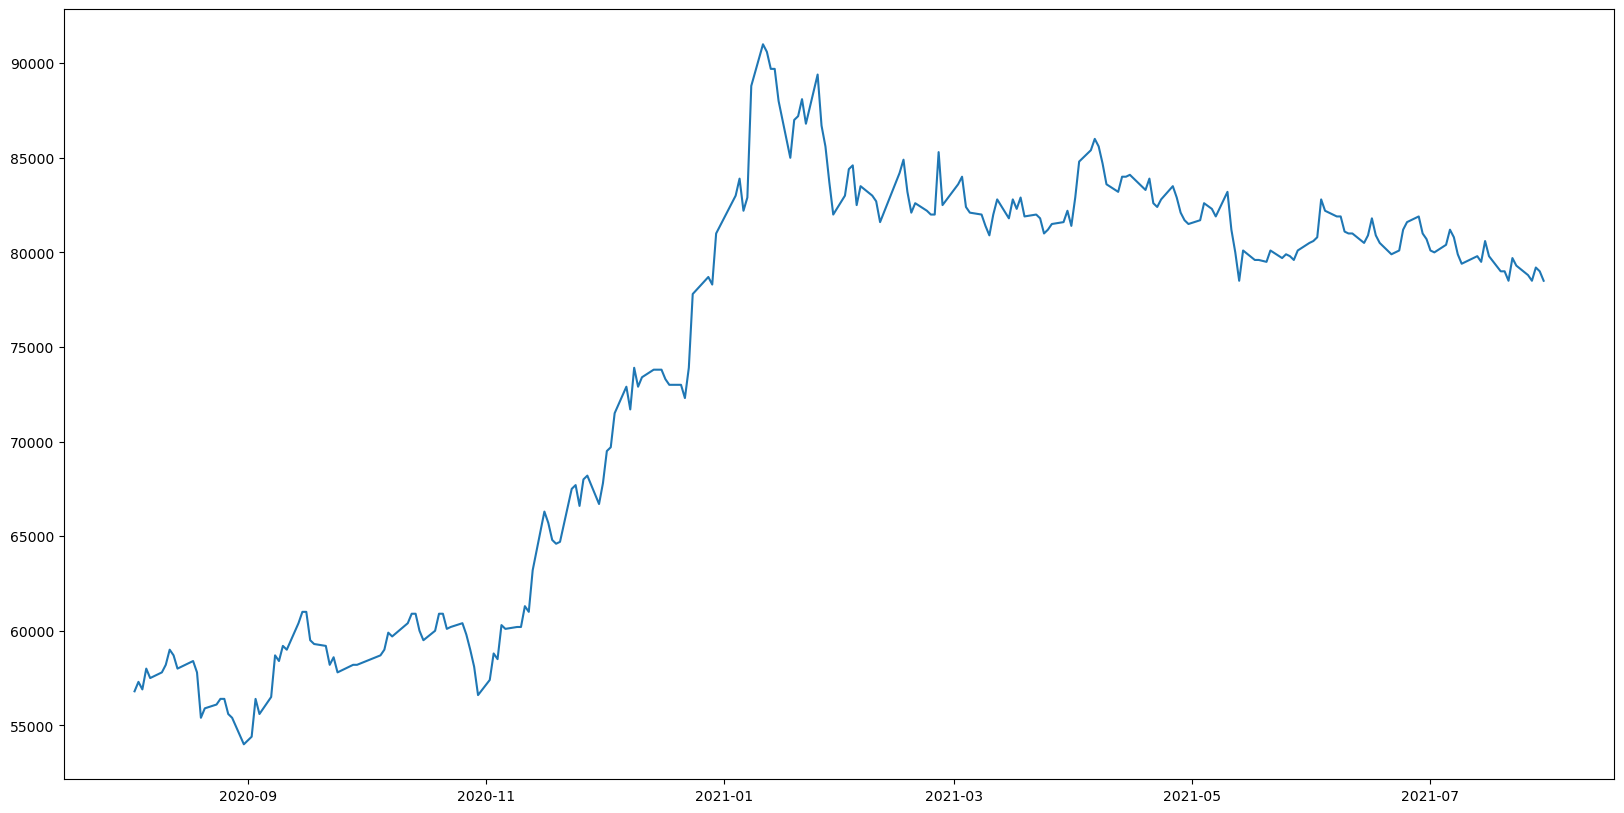

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.plot(data.index, data['close'])
print(f'\
        최대값: {max(data["close"])}\n\
        최솟값 : {min(data["close"])}')
plt.show()

### MDD

여기서는 기준일을 60일로 정한다. 즉, 60일 동안의 최고점과 최저점으로 계산을 해서 MDD를 나타낸다.

In [12]:
days = 60
peak = data['close'].rolling(days, min_periods=1).max() #60일 중 최고값
dd = data['close']/peak - 1.0 
max_dd = dd.rolling(days, min_periods=1).min() # 60일 중 최저값 == 60일 중 최대 낙폭비율

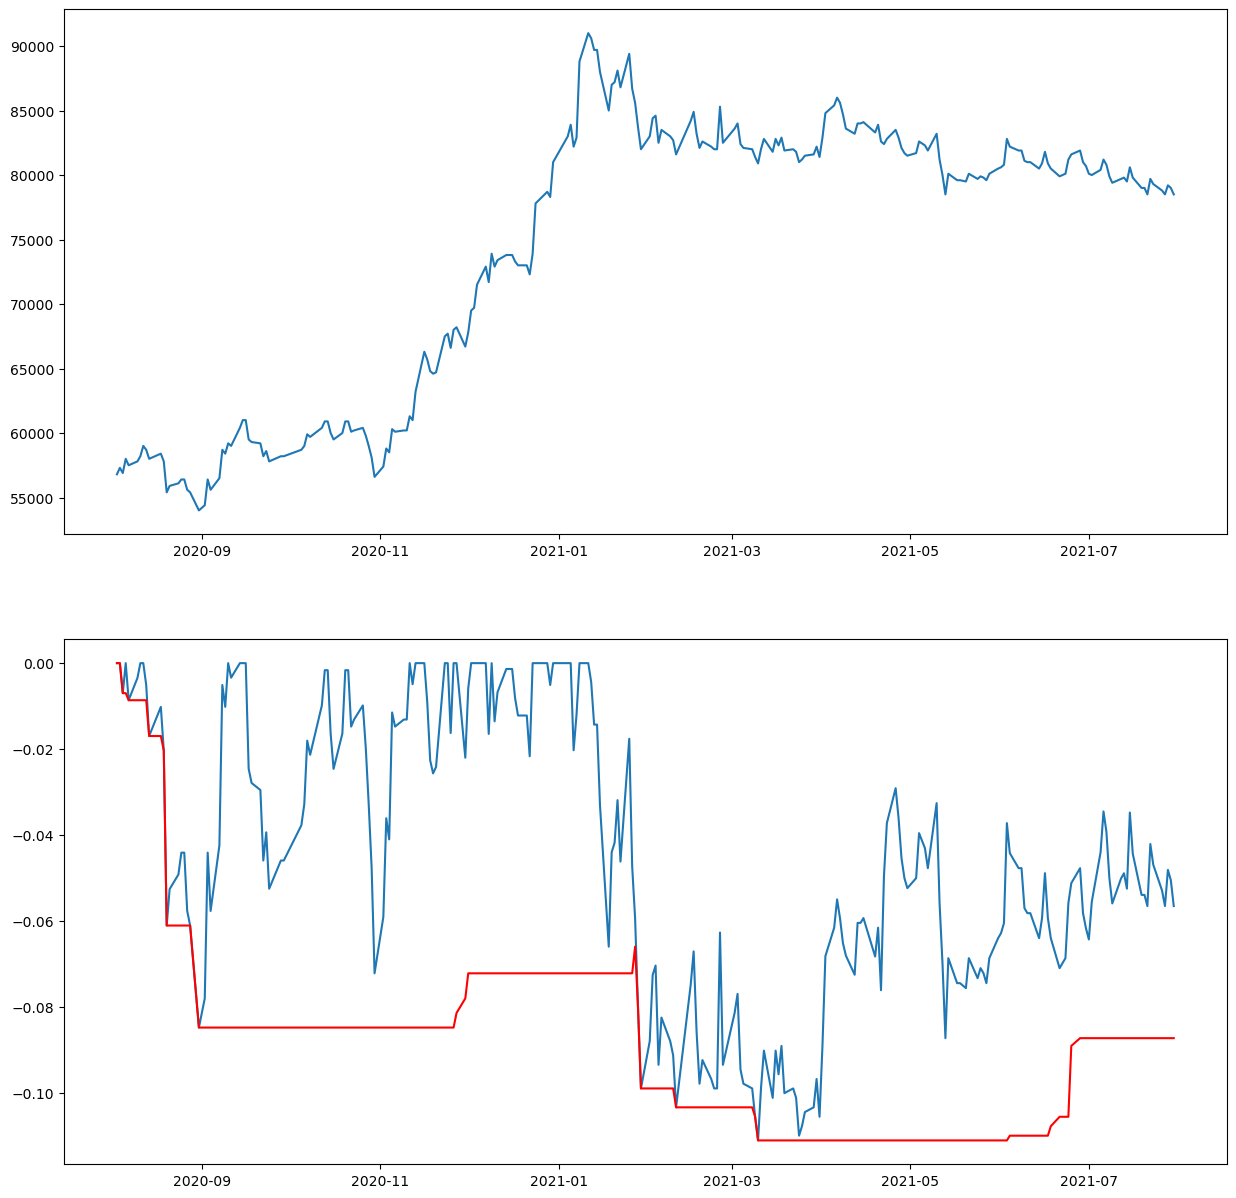

In [13]:
plt.figure(figsize=(15,15))
plt.subplot(211)
plt.plot(data['close'])
plt.subplot(212)
plt.plot(dd)
plt.plot(max_dd, c='r')
plt.show()

변동성이 큰 주식인 만큼 MDD 값 또한 크게 나온다.

MDD 가 0.0에 닿았다는 뜻은 설정한 기준일(60일) 중 최고가를 달성했다는 뜻이다.

반대로 MDD가 -1.0 값에 가깝다는 것은 그만큼 주가가 하락했다는 뜻이다.

## 비트코인의 최대 손실 낙폭

BTCUSDT


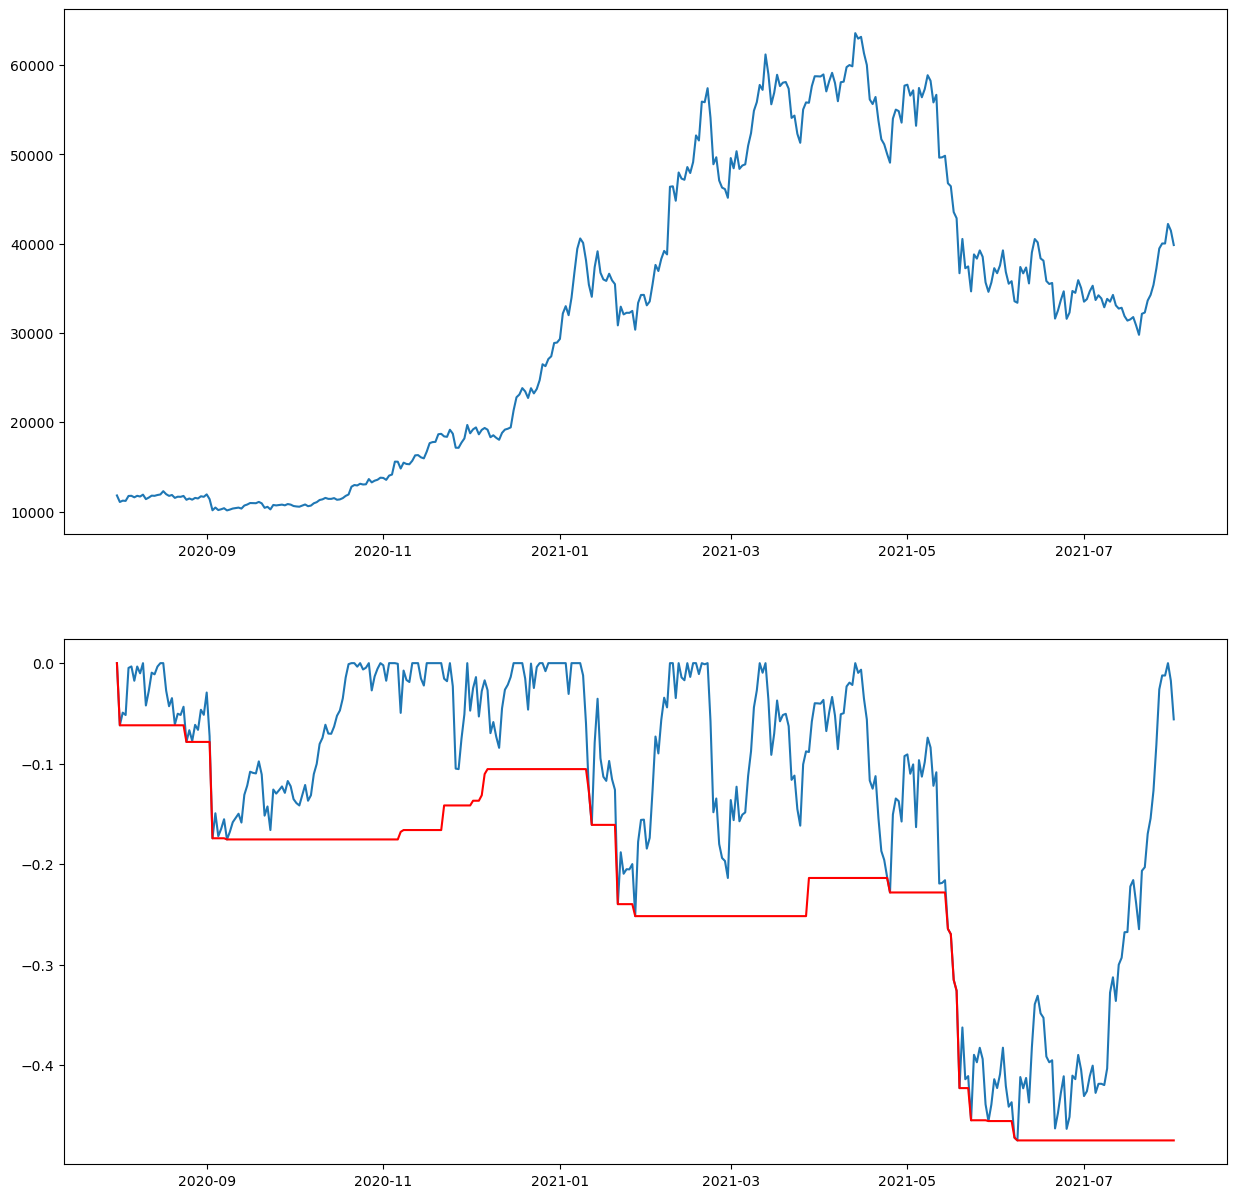

In [14]:
from coredotfinance.data import BinanceReader
binance = BinanceReader()
data = binance.read('BTCUSDT', start='2020-08-01', end='2021-08-01', interval='1d', reverse=True)

days = 60
peak = data['close'].rolling(days, min_periods=1).max() #60일 중 최고값
dd = data['close']/peak - 1.0 
max_dd = dd.rolling(days, min_periods=1).min() # 60일 중 최저값 == 60일 중 최대 낙폭비율

plt.figure(figsize=(15,15))
plt.subplot(211)
plt.plot(data['close'])
plt.subplot(212)
plt.plot(dd)
plt.plot(max_dd, c='r')
plt.show()

MDD가 -0.4라는 의미는 기준일(60일) 최고가 대비 40%까지 떨어졌다는 뜻이다. 

최고가가 100원이었던 주식이 60원이 되었다는 의미다.

비트코인이 가파른 상승을 했지만 자산이 기본적으로 가진 변동성과 낙폭 정도는 꽤나 크다.